# Análise de sentimento usando classificação de texto (Amazon Alexa)

Este conjunto de dados consiste de 5 colunas contendo avaliações dos clientes de produtos *Amazon Alexa*:
* rating: avaliações em número de estrelas,
* date: data da avaliação
* variation: variações de nomes dos modelo dos produtos
* verified_revies: avaliações textuais dos produtos
* feedback: representa a pontuação do sentimento, onde 1 denota positivo e 0 denota sentimento negativo. 

Link do dataset: <a href="https://www.kaggle.com/sid321axn/amazon-alexa-reviews" target="_blanck">Kaggle - Amazon Alexa Reviews</a>

## Objetivo:

Criar um modelo que possa classificar entre sentimento positivo ou negativo os textos de avaliações dos clientes dos produtos da *Amazon Alexa*.

## 1. Importando as Bibliotecas e o Dataset

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [3]:
# Exibe o dataset
df = pd.read_csv("amazon_alexa.tsv",sep="\t")
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## 2. Explorando o Dataset

In [27]:
df.feedback.value_counts()[1]

2893

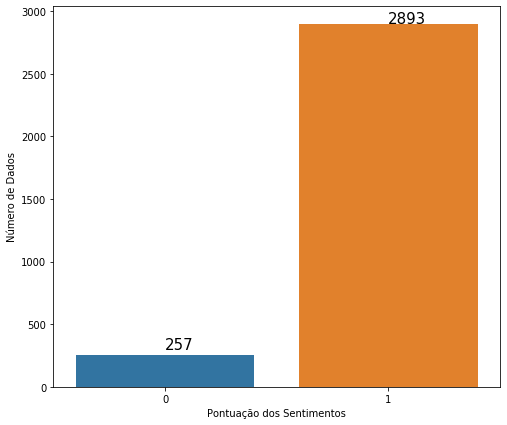

In [29]:
# Calcula a quantidade de feedbacks de 1 e 0
zero = df.feedback.value_counts()[0]
one = df.feedback.value_counts()[1]

# Desenha um gráfico da quantidade e sentimentos positivos(1) e negativos(0)
fig,ax = plt.subplots(figsize=(8,7))
sns.countplot(x='feedback', data=df,ax=ax)
ax.text(0,300,zero, size=15)
ax.text(1,2900,one, size=15)
plt.xlabel('Pontuação dos Sentimentos')
plt.ylabel('Número de Dados')
plt.show()

Neste gráfico, podemos observar que 2.893 críticas são positivas e 257 críticas são críticas negativas. 

## 3. Gerando atributos usando *CountVectorizer*

"Bag of Words" (BoW) é uma das técnicas de engenharia de recursos mais básicas, simples e populares para converter texto em um vetor numérico. Funciona em duas etapas: coleta de palavras do vocabulário e contagem de sua presença ou frequência no texto. Ele não considera a estrutura do documento e as informações contextuais.

Vamos gerar uma matriz de BoW para as avaliações dos clientes.

In [6]:
# Cria um Regextokenizer para remover símbolos e valores numéricos
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+') 
# Inicializa o CountVectorizer
count_vectorizer = CountVectorizer(lowercase=True, stop_words='english',ngram_range = (1,1), tokenizer = regex_tokenizer.tokenize)
# Ajusta e transforma os dados
count_vectors = count_vectorizer.fit_transform(df['verified_reviews'])

Criamos um objeto *RegexTokenizer* com uma expressão regular de entrada que remove os caracteres especiais e símbolos. Depois disso, o objeto *CountVectorizer* foi criado e executou a operação de ajuste e transformação nos textos de avaliação. Aqui, *CountVectorizer* usa parâmetros como *lowercase* para converter palavras-chave em minúsculas, *stop_words* para especificar um lista de palavras de interrupção específicas do idioma (em inglês, no caso), *ngram_range* para especificar o unigrama, bigrama ou trigrama, e o *tokenizer* que é usado para passar o objeto tokenizer. 

In [7]:
# Diviir os dados em conjunto de traino e e teste
feature_train, feature_test, target_train, target_test = train_test_split(count_vectors, df['feedback'],
                                                                        test_size=0.3, random_state=1)

Vamos construir o modelo de regressão logística para classificar os sentimentos de revisão usando BoW (ou CountVectorizer). Usamos esse modelo por ser um bom classificador para casos de classes binárias.

In [8]:
# Cria o modelo
logreg = LogisticRegression(solver='lbfgs')
# Ajusta o modelo com os dados
logreg.fit(feature_train,target_train)
# Prevê a variável alvo para o conjunto de teste
predictions = logreg.predict(feature_test)

In [9]:
# Avalie o desempenho do modelo usando métrica de acurácia 
print("Logistic Regression Model Accuracy: ", accuracy_score(target_test, predictions))
# Calcula a precisão do modelo
print("Logistic Regression Model Precision: ", precision_score(target_test, predictions))
# Calcula o recall (sensibilidade) do modelo
print("Logistic Regression Model Recall: ", recall_score(target_test,predictions))
# Calcula a métrica f1 score
print("Logistic Regression Model F1-Score: ", f1_score(target_test,predictions))

Logistic Regression Model Accuracy:  0.9428571428571428
Logistic Regression Model Precision:  0.952433628318584
Logistic Regression Model Recall:  0.9873853211009175
Logistic Regression Model F1-Score:  0.9695945945945945


Todas as medidas são maiores que 94%, então podemos dizer que nosso modelo está tendo um bom desempenho e classificando ambos os níveis de sentimento com uma boa quantidade de precisão e recall. 

## 4. Gerando atributos usando *TfidfVectorizer*

TF-IDF significa 'Term Frequency-Inverse Document Frequency'. Possui dois segmentos: Frequência do termo (TF) e Frequência inversa do documento (IDF). TF conta apenas a ocorrência de palavras em cada documento. É equivalente a BoW. TF não considera o contexto das palavras. O IDF calcula valores que correspondem à quantidade de informação mantida por uma palavra. 

TF-IDF normaliza os pesos dos documentos. Um valor mais alto de TF-IDF para uma palavra representa uma ocorrência mais alta naquele documento. 

Vamos gerar uma matriz TF-IDF para as avaliações do cliente usando o *TfidfVectorizer*

In [10]:
# Cria um Regextokenizer para remover símbolos e valores numéricos
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
# Inicializa o TfidfVectorizer 
tfidf = TfidfVectorizer(lowercase=True, stop_words='english',ngram_range = (1,1),tokenizer = regex_tokenizer.tokenize)
# Ajusta e transforma os dados
text_tfidf = tfidf.fit_transform(df['verified_reviews'])

No código anterior, criamos um objeto *RegexTokenizer* com uma expressão regular de entrada que remove os caracteres especiais e símbolos. Depois disso, o objeto *TfidfVectorizer* foi criado e executou a operação de ajuste e transformação nas revisões verificadas. Aqui, o *TfidfVectorizer* usa parâmetros semelhantes ao *CountVectorizer*.

In [11]:
# Divide os dados em conjunto de traino e de teste
X_train, X_test, y_train, y_test = train_test_split(text_tfidf, df['feedback'],
                                                                        test_size=0.3, random_state=1)

Vamos construir o modelo de regressão logística para classificar os sentimentos de revisão usando TF-IDF 

In [12]:
# Usa o modelo de regressão logistica  
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train,y_train)
predictions = logreg.predict(X_test)

In [13]:
# Calcula as métricas
print("Logistic Regression Model Accuracy:",accuracy_score(y_test, predictions))
print("Logistic Regression Model Precision:",precision_score(y_test, predictions))
print("Logistic Regression Model Recall:",recall_score(y_test,predictions))
print("Logistic Regression Model F1-Score:",f1_score(y_test,predictions))

Logistic Regression Model Accuracy: 0.9238095238095239
Logistic Regression Model Precision: 0.923728813559322
Logistic Regression Model Recall: 1.0
Logistic Regression Model F1-Score: 0.960352422907489


A acurácia e precisão deram valores menores que no caso anterior, o recall foi superior, mas no final o f1-score foi semelhante ao anterior.

## 5. Conclusão

Conseguimos criar bons modelos que avaliam como sentimentos positivo ou netaivo os textos de avaliações deixados por clientes do produto.

Usamos suas técnicas de engenharia de recuros, o Bag of Word e o TI-IDF, ambos se mostrarm satisfatórios na tarefa atribuída.